In [13]:
import numpy as np
def get_file_path(iot, device):
    return "./{}/{}_{}.txt".format(iot, iot, device)
def calc_latency_metrics_from_file(file_path):
    buffer = -1
    latencies = []
    lines = 0
    with open(file_path, "r") as file:
        # Read each line in the file one by one
        for index, line in enumerate(file):
            lines += 1
            value = int(line.strip())
            if index % 2 == 0 and buffer != -1:
                latencies += [value - buffer]
            else:
                buffer = value

    mean = np.mean(latencies)
    std = np.std(latencies)
    var = np.var(latencies)

    return mean, std, var, latencies

devices = {}

file_path = get_file_path("jetson_nano", "cpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_nano_cpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])
print()
file_path = get_file_path("jetson_nano", "gpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_nano_gpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])

print() 
file_path = get_file_path("raspberry", "cpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["raspberry_cpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])
print() 

file_path = get_file_path("jetson_orin", "cpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_orin_cpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])

print() 
file_path = get_file_path("jetson_orin", "gpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_orin_gpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])

print()
file_path = get_file_path("jetson_xavier", "cpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_xavier_cpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])

print()
file_path = get_file_path("jetson_xavier", "gpu")
metrics = calc_latency_metrics_from_file(file_path)
devices["jetson_xavier_gpu"] = metrics
print("Mean: ", metrics[0])
print("Std: ", metrics[1])
print("Var: ", metrics[2])


Mean:  218.14141414141415
Std:  159.87141361397136
Var:  25558.868890929505

Mean:  228.44444444444446
Std:  101.11521803181088
Var:  10224.287317620652

Mean:  252.56565656565655
Std:  167.85727232096193
Var:  28176.063871033566

Mean:  273.35353535353534
Std:  698.8589590967005
Var:  488403.8447097236

Mean:  290.62626262626264
Std:  235.75044954737547
Var:  55578.274461789624

Mean:  258.73737373737373
Std:  160.7035407112835
Var:  25825.62799714315

Mean:  269.1515151515151
Std:  101.73071640031085
Var:  10349.138659320475


<Figure size 600x480 with 0 Axes>

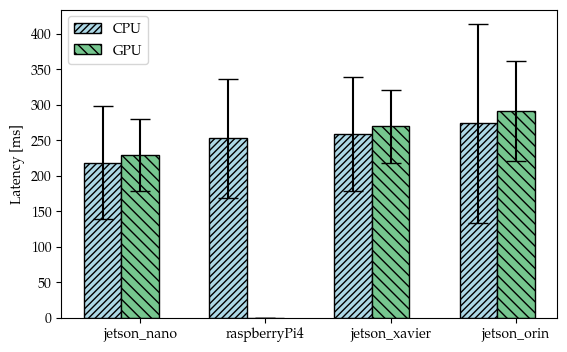

In [14]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib import rcParams

for font in font_manager.findSystemFonts("../grafiche"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
plt.figure().set_figwidth(6)
plt.figure().set_figheight(4)
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [devices["jetson_nano_cpu"][0], devices["raspberry_cpu"][0], devices["jetson_xavier_cpu"][0], devices["jetson_orin_cpu"][0]]
 
# Choose the height of the cyan bars
bars2 = [devices["jetson_nano_gpu"][0], 0, devices["jetson_xavier_gpu"][0], devices["jetson_orin_gpu"][0]]
 
# Choose the height of the error bars (bars1)
yer1 = [devices["jetson_nano_cpu"][1] * 0.5, devices["raspberry_cpu"][1] * 0.5, devices["jetson_xavier_cpu"][1] * 0.5, devices["jetson_orin_cpu"][1] * 0.2]
 
# Choose the height of the error bars (bars2)
yer2 = [devices["jetson_nano_gpu"][1] * 0.5, 0, devices["jetson_xavier_gpu"][1] * 0.5, devices["jetson_orin_gpu"][1] * 0.3]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'lightblue', edgecolor = 'black', yerr=yer1, capsize=7, label='CPU', hatch='/////')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = '#76c68f', edgecolor = 'black', yerr=yer2, capsize=7, label='GPU', hatch='\\\\\\')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['jetson_nano', 'raspberryPi4', 'jetson_xavier', 'jetson_orin'])
plt.ylabel('Latency [ms]')
# grid
plt.grid(False)
# plt.title("Container startup latency")
plt.legend()

# save plot as pdf
plt.savefig('../reports/os_container_comparison/pdfs//container_startup_latency.pdf', bbox_inches='tight')